# Ensemble Learning

## bagging(kind of)

 - commonly used for competition and improving model accuracy

<img src="1.png" style="width:800px;height:500px;float:left">

 - 对于数据源X，分别选择两种预处理方案，在不同预处理方案中再建立不同模型，最终汇总所有模型结果  
   
 
 -  eg: f1 is KNN; f2 is random forest; f3 is SVM; f4 is ... ;    
 
   
 -  get the mean of results from different models, that's the true result of the ensemble learning

In [14]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
### Import data
df = pd.read_csv('input.csv')

print("\nExample data:")
df.head()


Example data:


,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0


- import data, then need to split the data, before splitting, don't forget to set a seed for reproducibility  
  
- make a function  
  - since y is 'cand_pty_affiliation', which is a category variable with two different kinds of string, so let y become a dummy: y = 1* [df.cand_pty_affiliation == 'REP']  
  - then, X is all the features without y, but we found that most of features are category variables, so we use one-hot encoding, to let X got dummies.  
  - drop some meaningless features, like some features are always consistent and same, then its std will be 0. We should drop such features, cuz they bring a lot of noises

In [16]:
seed = 222

from sklearn.model_selection import train_test_split

def get_train_test(test_size):
    y = 1*(df.cand_pty_affiliation == 'REP') #use parenthesis is a series, don't use brackets, which will make list
    X = df.drop('cand_pty_affiliation', axis=1)
    X = pd.get_dummies(X)
    X = X.drop(X.columns[X.std()==0]) # X = X.drop(X.columns[X.describe().loc['std',:]==0])
    return train_test_split(X,y, test_size=test_size, random_state = seed)

Xtrain,Xtest,ytrain,ytest = get_train_test(0.95)
Xtrain
    

,cycle,transaction_amt,cand_office_st_AK,cand_office_st_AL,cand_office_st_AR,cand_office_st_AZ,cand_office_st_CA,cand_office_st_CO,cand_office_st_CT,cand_office_st_DC,...,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,state_ZZ,classification_Engineer,classification_Math-Stat,classification_Scientist
34018,2008.0,250.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
52563,2012.0,200.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26117,2008.0,250.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
66112,2012.0,250.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33433,2010.0,1000.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17750,2008.0,250.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
76012,2016.0,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31614,2016.0,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48706,2008.0,4600.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


* cand_pty_affiliation：我们要预测的指标，共和党或者民主党
* entity_tp：个人还是组织
* classification:领域
* rpt_tp：贡献的大小
* cycle：捐赠在哪年
* transaction_amt：捐献金额


## ROC 与 AUC
<img src="11.png" alt="FAO" width="690" >

<img src="10.png" alt="FAO" width="690" >

接下来我们考虑ROC曲线图中的四个点和一条线。第一个点，(0,1)，即FPR=0, TPR=1，这意味着FN（false negative）=0，并且FP（false positive）=0。Wow，这是一个完美的分类器，它将所有的样本都正确分类。第二个点，(1,0)，即FPR=1，TPR=0，类似地分析可以发现这是一个最糟糕的分类器，因为它成功避开了所有的正确答案。第三个点，(0,0)，即FPR=TPR=0，即FP（false positive）=TP（true positive）=0，可以发现该分类器预测所有的样本都为负样本（negative）。类似的，第四个点（1,1），分类器实际上预测所有的样本都为正样本。经过以上的分析，我们可以断言，ROC曲线越接近左上角，该分类器的性能越好。

下面考虑ROC曲线图中的虚线y=x上的点。这条对角线上的点其实表示的是一个采用随机猜测策略的分类器的结果，例如(0.5,0.5)，表示该分类器随机对于一半的样本猜测其为正样本，另外一半的样本为负样本。

AUC（Area Under Curve）被定义为ROC曲线下的面积，显然这个面积的数值不会大于1。又由于ROC曲线一般都处于y=x这条直线的上方，所以AUC的取值范围在0.5和1之间。使用AUC值作为评价标准是因为很多时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而作为一个数值，对应AUC更大的分类器效果更好。

In [17]:
from sklearn.metrics import roc_auc_score

## single model and ensemble model

 - now, let's see the distribution of 1 and 0 in y

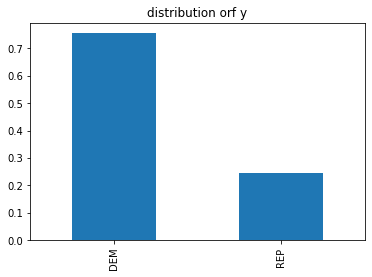

In [18]:
df['cand_pty_affiliation'].value_counts(normalize=True).plot(kind='bar',title='distribution orf y')


### try some decision trees

In [19]:
import pydotplus  # you can install pydotplus with: pip install pydotplus 
#安装graphviz  http://download.csdn.net/download/shouwangzhelv/9492517
#将安装或者解压的graphviz下的bin目录添加到系统的path中，重启notebook
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def print_graph(clf, feature_names):
    """Print decision tree."""
    graph = export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=False, 
        out_file=None, 
        feature_names=feature_names,
        class_names={0: "D", 1: "R"}, #让0展示为D，1展示为R
        filled=True,
        rounded=True
    )
    graph = pydotplus.graph_from_dot_data(graph)  
    return Image(graph.create_png())

Decision tree ROC-AUC score: 0.672


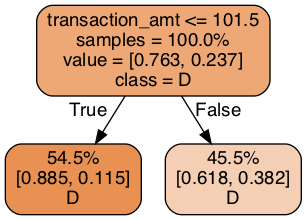

In [21]:
t1 = DecisionTreeClassifier(max_depth=1, random_state=seed)
t1.fit(Xtrain,ytrain)
#p = t1.predict_proba(xtest) 这样得到的p是两列，一列是对0的prob，一列是对1的prob
p = t1.predict_proba(Xtest)[:,1]

print('Decision tree ROC-AUC score: %.3f' % roc_auc_score(ytest,p))
print_graph(t1,Xtrain.columns)


>- **`⬇️the reason why using the second column of p:`**  
The binary case expects a shape (n_samples,), and the scores must be the scores of the class with the greater label

#### let's improve the decision tree and see what happened

Decision tree ROC-AUC score: 0.751


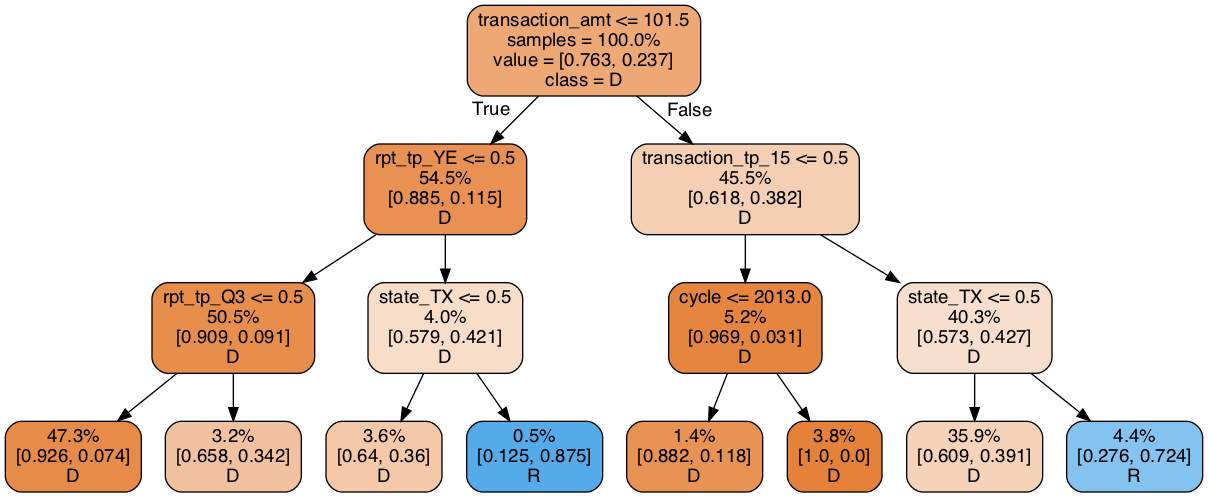

In [24]:
t2 = DecisionTreeClassifier(max_depth=3, random_state=seed)
t2.fit(Xtrain,ytrain)
#p = t1.predict_proba(xtest) 这样得到的p是两列，一列是对0的prob，一列是对1的prob
p = t2.predict_proba(Xtest)[:,1]

print('Decision tree ROC-AUC score: %.3f' % roc_auc_score(ytest,p))
print_graph(t2,Xtrain.columns)

> ⬆️the larger percentile, deeper orange color

In this chart, we can find that most of the predictions are 'D', which seems that it's overfitting, so let's adjust this model!

#### try to delete the most influential feature

Decision tree ROC-AUC score: 0.740


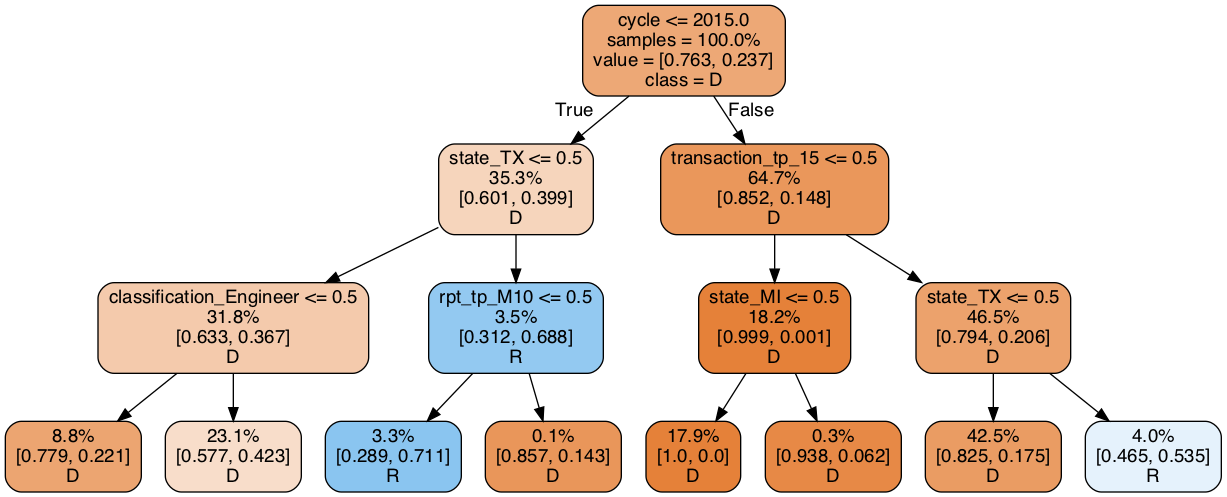

In [28]:
drop = ['transaction_amt']
xtrain_slim=Xtrain.drop(drop,1)
xtest_slim=Xtest.drop(drop,1)

t3 = DecisionTreeClassifier(max_depth=3, random_state=seed)
t3.fit(xtrain_slim,ytrain)
#p = t1.predict_proba(xtest) 这样得到的p是两列，一列是对0的prob，一列是对1的prob
p = t3.predict_proba(xtest_slim)[:,1]

print('Decision tree ROC-AUC score: %.3f' % roc_auc_score(ytest,p))
print_graph(t3,xtrain_slim.columns)


> `⬆️ Although we delete the most influential feature, the ROC-AUC score is very close the former one.  `  
**But remember that!** these two decision trees are totally different, they have different errors, but we can also combine them to get prediciton improved.

### ensemble these two decision trees

In [30]:
p1 = t2.predict_proba(Xtest)[:,1]
p2 = t3.predict_proba(xtest_slim)[:,1]
p = np.mean([p1,p2],axis=0)

print('Average of decision tree ROC-AUC score: %.3f' %roc_auc_score(ytest,p))

Average of decision tree ROC-AUC score: 0.783


> ⬆️it's better!!!    
seems that ensembling makes a better model, so let's try a random forest and see what will happen

### try random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
 n_estimators=10,
 max_features=3,
 random_state=seed
)

rf.fit(Xtrain,ytrain)
p=rf.predict_proba(Xtest)[:,1]
print('random forest ROC-AUC score: %.3f' %roc_auc_score(ytest,p))

random forest ROC-AUC score: 0.844


## Bagging

<img src="2.png" style="width:500px;height:350px;float:left">
<img src="5.png" style="width:400px;height:200px;float:left">

In [33]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

1. 做一个def get_models：把所有要用的模型都列好，并且用dictionary来一一对应好（为的是后面能把两个分开同时又能对应上   
2. 做一个def train_predict：
  1. 先做一个P，变为dataframe
  2. for loop 循环，把各个模型的prediction拿来填充P，以及把各个模型对应的名字做列名
  3. return P  
3. 做一个def score_models：得到每一个模型的ROC-AUC score

In [36]:
def get_models(): #不管()里有没有东西，都要有()！
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=seed)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=seed)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=seed)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=seed)
    
    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }
    return models


def train_predict(model_list):
    P = np.zeros((ytest.shape[0],len(model_list)))
    #shape : int or tuple of ints
    P = pd.DataFrame(P)
    cols=[]
    
    for i, (name,m) in enumerate (models.items()): 
        #dictionary 的items()是专门输出key+value的
        #enumerate(iterable, start=0)
        m.fit(Xtrain,ytrain)
        P[i] = m.predict_proba(Xtest)[:,1]
        cols.append(name)
        #注意是直接append，不需要cols=cols.append()
        
    P.columns=cols
    #https://blog.csdn.net/chenKFKevin/article/details/72847622
    return P

def score_models():
    for name in models.keys():
        print(name,'%.3f' %roc_auc_score(ytest,P[name]))
    print('done')


In [37]:
models = get_models()
P = train_predict(models)
score_models()

svm 0.845
knn 0.779
naive bayes 0.803
mlp-nn 0.873
random forest 0.844
gbm 0.878
logistic 0.853
done


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


> ⬆️结果出来了，gbm最大，它本身是一个boosting，所以本来就是比较好的

### 用correlation来看一下各个模型之间差异的程度

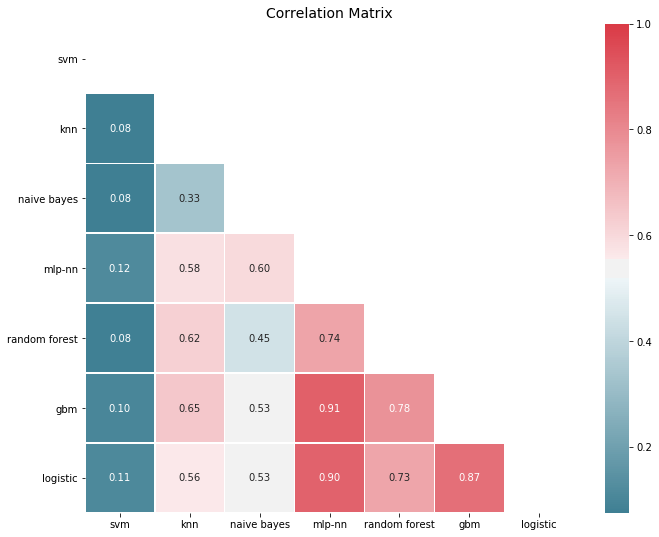

In [38]:
# You need ML-Ensemble for this figure: you can install it with: pip install mlens
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)
plt.show()

> ⬆️如果发现相关性是100%，那就没必要做另外一个模型了；  
   如果两个模型，一个ROC-AUC很高，一个很低，两个模型相差也很大，那就可以只保留ROC-AUC高的

### 看一下ROC-AUC

In [39]:
print('Ensemble ROC-AUC Score: %.3f' %roc_auc_score(ytest, P.mean(axis=1)))

Ensemble ROC-AUC Score: 0.883


>- ⬆️这是最高的！wwwww

<img src="6.png" style="width:500px;height:450px;float:left">

集成算法一方面使得边界更平稳，一方面使得效果更好！

> ⬆️我们可以看到集成算法确实很好，但是也有它自身的缺陷：  
因为集成是把所有的模型都跑了一遍，所以时间消耗大，  
**`虽然精度很好，但是很难做实时的预测，所以集成更适合离线。`**

### ROC-AUC figure

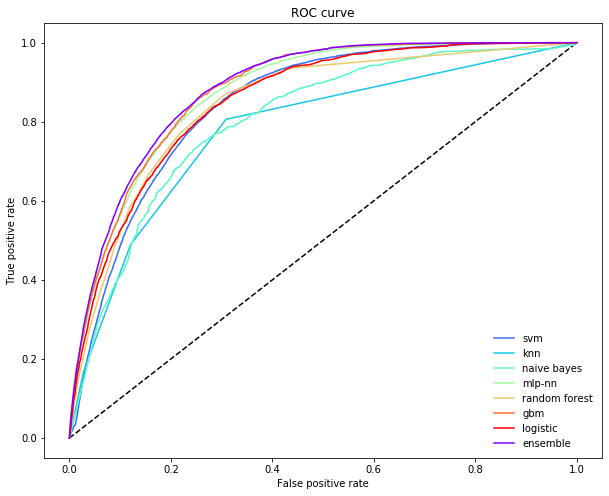

In [40]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(ytest, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(ytest, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()


plot_roc_curve(ytest, P.values, P.mean(axis=1), list(P.columns), "ensemble")

>⬆️可以发现 ensemble的面积最大，是最好的  
  但是之前的集成都是按照平均来算的，这样公平吗？**有些拖后腿的怎么办呢？**

### 看看各个模型的性能

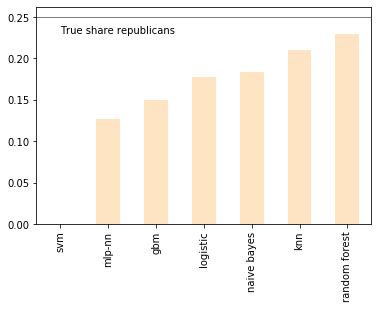

In [41]:
p = P.apply(lambda x: 1*(x >= 0.5).value_counts(normalize=True))
#https://blog.csdn.net/SeeTheWorld518/article/details/46959593
p.index=['DEM','REP']
p.loc["REP", :].sort_values().plot(kind="bar",color='bisque')
plt.axhline(0.25, color="k", linewidth=0.5)
plt.text(0., 0.23, "True share republicans")
plt.show()

> ⬆️seems that SVM is the worst,  
so what's the ROC-AUC without the svm? ⬇️

In [42]:
include = [c for c in P.columns if c not in ["svm"]]
print("Truncated ensemble ROC-AUC score: %.3f" % roc_auc_score(ytest, P.loc[:, include].mean(axis=1)))

Truncated ensemble ROC-AUC score: 0.883


> ⬆️看起来ROC-AUC都没变化，而且这也没法一直人工来调，  
所以我们开始考虑stacking 模型

# Stacking

<img src="7.png" style="width:200px;height:100px;float:left">
<img src="8.png" style="width:300px;height:70px;float:left">

对于每一个基础模型，选择一个最合适的权重，但是这些权重我们来怎么定义呢？那就让我们训练一个模型来定义这些权重吧！

在这里我们需要考虑一点 第二个模型的输入应该是什么呢？这需要重点考虑！

### 定义我们的基础模型

还是之前的那些模型 运用之前的function get_models()

In [43]:
base_learners = get_models()

### 定义我们的权重分配模型（第二层架构）

In [44]:
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=4,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.005, 
    random_state=seed
)

### 将基础模型分成两部分，主要供第二层来使用

> **`为什么要分两部分呢？`**  
因为第一阶段，如果所有模型都用全部数据来做预测，那么第二阶段模型的数据就是所有被训练过的数据，那就很有可能造成过拟合的现象。  

> 所以说现在，我们希望第二阶段的模型用的数据是第一阶段模型没用过的，所以把数据分为两个部分，train和test，train拿来给一阶段的模型做训练，然后拿test做prediction给第二阶段

In [46]:
xtrain = Xtrain.values
ytrain = ytrain.values

In [47]:
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(
    xtrain, ytrain, test_size=0.5, random_state=seed)

### 训练我们的基础模型

In [48]:
def train_base_learners(learner, inp , output):
    for i, (name,m) in enumerate (learner.items()):
        m.fit(inp,output)

In [49]:
train_base_learners(base_learners, xtrain_base, ytrain_base)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


现在已经训练好了基本分类器，但是我们二阶段要求的输入是一阶段没有看过的那些！

<img src="9.png" style="width:400px;height:70px;float:left">

### 准备二阶段权重分配分类器的训练数据

In [50]:
def predict_base_learners(learner,inp):
    P = np.zeros((inp.shape[0], len(learner)))
    for i, (name,m) in enumerate (learner.items()):
        P[:,i] = m.predict_proba(inp)[:,1]
        # 对array来说，列这么写才对，如果是P[i]则说明是P的第i行
    return P         

In [51]:
P_base = predict_base_learners(base_learners,xpred_base)

In [52]:
P_base.shape

(2500, 7)

In [53]:
P_base[0]

array([2.30442759e-01, 0.00000000e+00, 4.87126290e-52, 5.19625789e-02,
       0.00000000e+00, 1.25337787e-02, 2.23076813e-03])

> ⬆️这里每列都是一个特征，阶段二将用这个P_base来做进一步的预测

### 训练二阶段

In [54]:
meta_learner.fit(P_base, ypred_base)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='exponential', max_depth=3,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=222, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### 得出一二阶段一起的ROC-AUC

In [55]:
def ensemble_predict(base_learners,meta_learner,inp):
    P_pred = predict_base_learners(base_learners,inp)
    p = meta_learner.predict_proba(P_pred)[:,1]
    return P_pred, p

In [58]:
P_pred, p = ensemble_predict(base_learners,meta_learner,Xtest)
#注意是xtest！

In [59]:
print('Ensemble ROC-AUC Score: %.3f' %roc_auc_score(ytest,p))

Ensemble ROC-AUC Score: 0.880


> ⬆️又提升了！

> 划分为训练集和测试集虽然能满足咱们的要求，但是！  
因为我们是分了两个部分的数据，在第一阶段只用了第一部分的数据，这对于第一阶段的各个模型来说，少了很多数据的训练，导致预测结果不是很优。  
`所以好像损失了一部分数据，那怎么办？`  
`**cross validation**`

### cross validation

做一个function stacking(base_learners, meta_learner, X, y, kfold)：
1. 训练好各个第一阶段的模型
2. 用 cross validation来做各个模型

In [62]:
from sklearn.base import clone

def stacking(base_learners, meta_learner, X, y, generator):
    """Simple training routine for stacking."""

    # Train final base learners for test time
    print("Fitting final base learners...", end="")
    train_base_learners(base_learners, X, y)
    print("done")

    # Generate predictions for training meta learners
    # Outer loop:
    print("Generating cross-validated predictions...")
    cv_preds, cv_y = [], []
    for i, (train_idx, test_idx) in enumerate(generator.split(X)):

        fold_xtrain, fold_ytrain = X[train_idx, :], y[train_idx]
        fold_xtest, fold_ytest = X[test_idx, :], y[test_idx]

        # Inner loop: step 4 and 5
        fold_base_learners = {name: clone(model)
                              for name, model in base_learners.items()}
        train_base_learners(
            fold_base_learners, fold_xtrain, fold_ytrain)

        fold_P_base = predict_base_learners(
            fold_base_learners, fold_xtest)

        cv_preds.append(fold_P_base)
        cv_y.append(fold_ytest)
        print("Fold %i done" % (i + 1))

    print("CV-predictions done")
    
    # Be careful to get rows in the right order
    cv_preds = np.vstack(cv_preds)
    cv_y = np.hstack(cv_y)

    # Train meta learner
    print("Fitting meta learner...", end="")
    meta_learner.fit(cv_preds, cv_y)
    print("done")

    return base_learners, meta_learner




In [64]:
from sklearn.model_selection import KFold

# Train with stacking
cv_base_learners, cv_meta_learner = stacking(
    get_models(), clone(meta_learner), xtrain, ytrain, KFold(2))

P_pred, p = ensemble_predict(cv_base_learners, cv_meta_learner, Xtest)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Fitting final base learners...

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


done
Generating cross-validated predictions...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold 1 done


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold 2 done
CV-predictions done
Fitting meta learner...done

Ensemble ROC-AUC score: 0.888


### 并行训练

几个模型可以一起训练，不用一个模型做好了再等另一个，所以可以并行训练，并不影响

In [65]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=seed,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(xtrain, ytrain)

# Predict the test set
p_sl = sl.predict_proba(Xtest)

print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(ytest, p_sl[:, 1]))


Fitting 2 layers
Processing layer-1             

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

done | 00:01:35
Processing layer-2             done | 00:00:03
Fit complete                        | 00:01:39

Predicting 2 layers
Processing layer-1             done | 00:00:38
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:40

Super Learner ROC-AUC score: 0.889


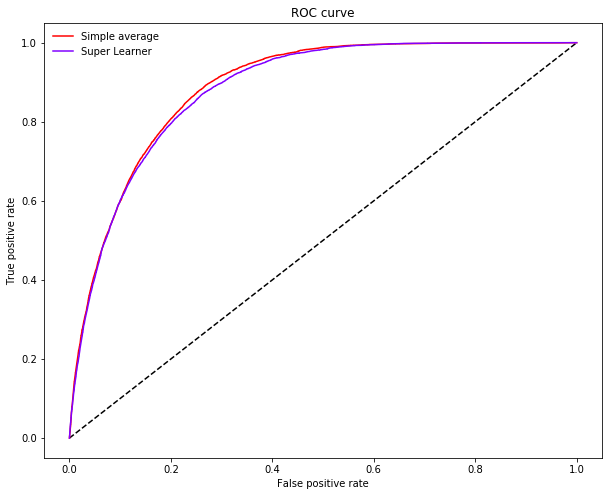

In [66]:
plot_roc_curve(ytest, p.reshape(-1, 1), P.mean(axis=1), ["Simple average"], "Super Learner")

super learner调参以后可能会更好